# Prediction of renewable energy generation

## Context
A friend recently had to sign a new electricity supply contract. The high prices surprised him very much and he decided to look into the electricity market. Among a lot of other information, he learned that electricity is also traded on an exchange.
He found the so-called "day-ahead" market, where electricity is traded for the next day, the most interesting. He found out that the price is almost completely determined by the supply, because the demand hardly changes at such short notice (no private person turns on less light and no industrial company stops production at such short notice). He also found out that there are already very good forecasting models for this.
The electricity supply, on the other hand, has become much more exciting in recent years. Wind turbines and large photovoltaic plants have hardly any running costs and can therefore undercut any other power plant (in the short term). However, their production strongly depends on the current weather in the area where the respective plant is located. The "conventional" power plants, which then fill the gaps to demand, determine the electricity price based on their operating costs. If you know the current oil, coal and gas prices, this is also relatively easy to predict.

Meanwhile, he is sure that you could make good money if you had a good forecast of how much electricity wind power and PV will deliver. Since he has heard that you now have some experience with data analysis, he asks you to help him and to create a forecast model that predicts the amount of electricity produced (wind & photovoltaic) based on a weather report.

As he is aware that data is needed for this, he has already obtained data:
 - From "SMARTD" (part of the regulatory authority) the installed production capacity of the different types of power plants ("energy_installed_capacity.csv") and the amount of electricity produced in reality ("energy_produced.csv").
 - Daily records from the DWD (weather service) at many measuring stations. Two files, one with the measured values (weather.csv“), one with further information (e.g. location) of the measuring stations („weatherstations.csv“).
Both sources (all four data sets) cover the period from 2016 to 2021 inclusive.

He is also sure - if the model is good enough to be worthwhile - to be able to buy sufficiently good weather forecasts, no matter in which form they would be needed exactly. So there are no limititations how the data is groupped or preprocessed.

## Assignment

Develop a forecast model, evaluate it and answer the question whether it would be useful for the intended use!
Deliver a Jupyter notebook (able to run on the server) that includes the following parts:
- Data analysis and exploration, including preparation for the model. This includes (but not limited to):
  - understanding the data (continous/categorial, range of values ...)
  - unifying the time base
  - detecting and dealing missing data point
  - possibly necessary simplifications
- Develop and evaluate a model for the forecast.
- Conclude whether (at least on the basis of the data) a meaningfully usable forecasting model could be achieved. 


## Exploratory Data Analysis & Data preparation


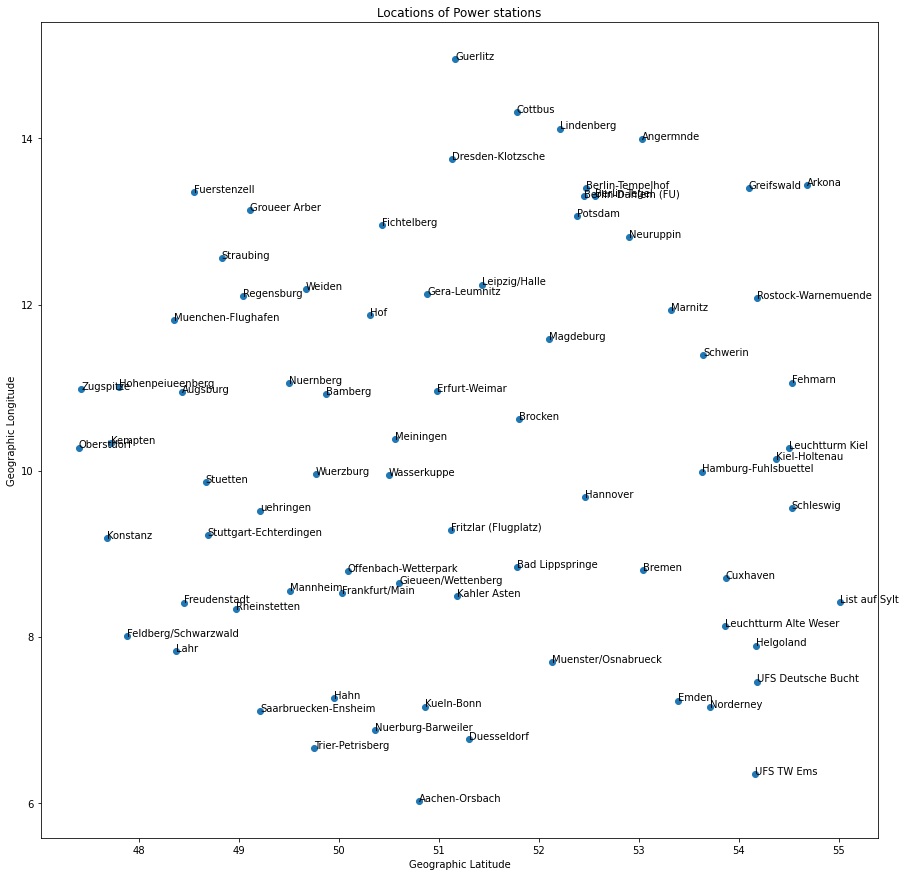

In [1]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

data=pd.read_csv('weatherstations.csv')
data_array = numpy.array(data)
names=data_array[:,1]
Latitude=data_array[:,2]
longitude=data_array[:,3]

fig, ax = plt.subplots(figsize=(15, 15))
ax.scatter(Latitude,longitude)
for i, txt in enumerate(names):
    ax.annotate(txt, (Latitude[i], longitude[i]))   
plt.title("Locations of Power stations")
plt.xlabel("Geographic Latitude")
plt.ylabel("Geographic Longitude")
plt.show()

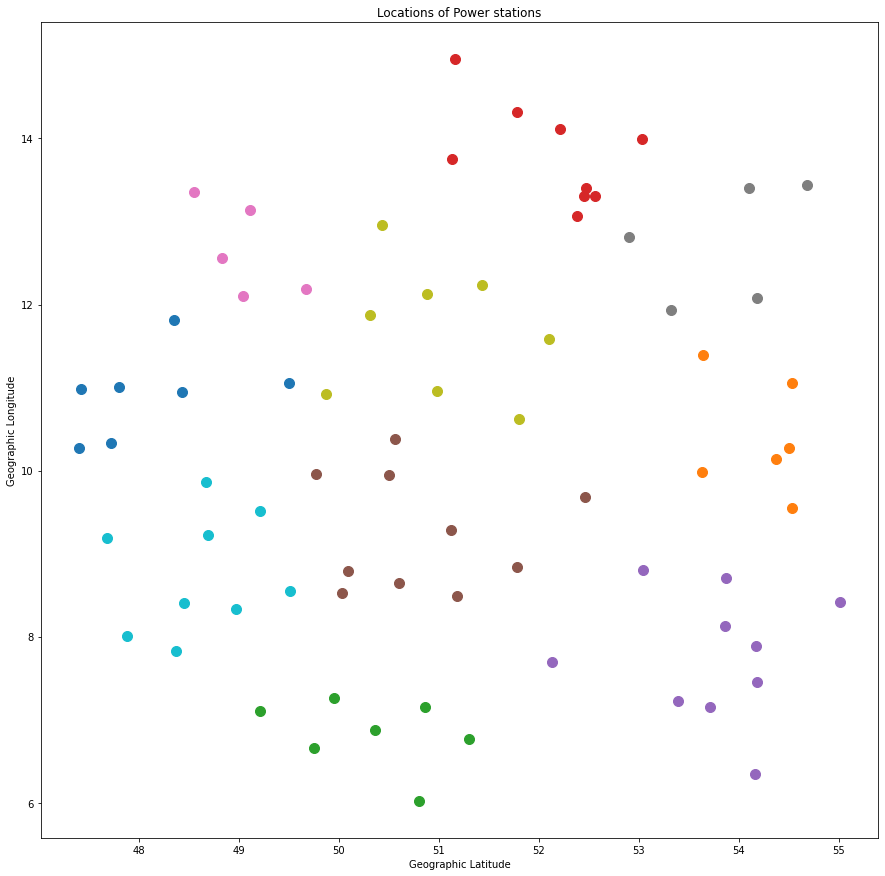

In [2]:
from sklearn.cluster import KMeans

dataset=pd.read_csv('weatherstations.csv')
x=dataset.iloc[:,[2,3]].values

kmeans=KMeans(n_clusters=10,init='k-means++',max_iter=300,n_init=10,random_state=0)
y_kmeans=kmeans.fit_predict(x)

fig, cl = plt.subplots(figsize=(15, 15))

#Visualising the n_clusters
for i in range(10):
    plt.scatter(x[y_kmeans==i,0],x[y_kmeans==i,1],s=100)  
plt.title("Locations of Power stations")
plt.xlabel("Geographic Latitude")
plt.ylabel("Geographic Longitude")
plt.show()

In [ ]:
'''

The Power stations are distributed in 10 clusters.

It is evident that the distribution of Power stations is well distributed all over Germany.

In further analysis, data of some Power stations needs to be deleted due to some reasons (missing Data) 
Data from some stations can be done without affecting our analysis and solution as the data from a few stations in 
particular clusters will be deleted.

'''

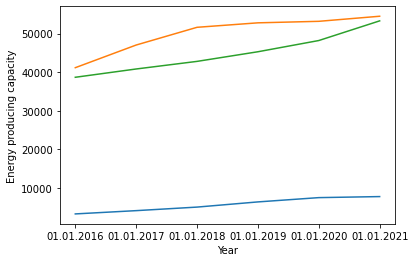

In [9]:
# Energy produced capacity
data_ei = pd.read_csv("energy_installed_capacity.csv", sep = ";")

x_coordinates = data_ei["Date"]
y1_coordinates = data_ei["Wind Offshore[MW]"]
y2_coordinates = data_ei["Wind Onshore[MW]"]
y3_coordinates = data_ei["Photovoltaics[MW]"]
plt.plot(x_coordinates, y1_coordinates, label="Wind Offshore[MW]") # plot first line
plt.plot(x_coordinates, y2_coordinates, label="Wind Onshore[MW]")
plt.plot(x_coordinates, y3_coordinates, label="Photovoltaics[MW]")
plt.xlabel("Year")
plt.ylabel("Energy producing capacity")
plt.show()

In [6]:
# Energy produced data (Wind offshore, Wind onshore, Photovoltaics)
data_ep=pd.read_csv('energy_produced.csv',sep = ";")
data_ep.drop(["Biomass[MW]","Coal[MW]","Brown coal[MW]","Water power[MW]","Other renewables[MW]","Nuclear power[MW]","Nuclear power[MW]","Natural gas[MW]","Pump storage[MW]","Other conventional[MW]"],axis=1,inplace=True)
data_ep.head(10)

,Date,Time,Wind Offshore[MW],Wind Onshore[MW],Photovoltaics[MW]
0,01.01.2016,00:00,571,1649,0
1,01.01.2016,00:15,570,1602,0
2,01.01.2016,00:30,570,1569,0
3,01.01.2016,00:45,565,1552,0
4,01.01.2016,01:00,568,1563,0
5,01.01.2016,01:15,573,1563,0
6,01.01.2016,01:30,577,1578,0
7,01.01.2016,01:45,569,1590,0
8,01.01.2016,02:00,563,1579,0
9,01.01.2016,02:15,561,1575,0


In [7]:
# Total energy produced by Power Plants daily (Sum of energy produced in each interval of 15 minutes on a particular Date)
data_ep.columns = data_ep.columns.str.replace(' ','_')
data_ep=data_ep.groupby('Date')['Wind_Offshore[MW]','Wind_Onshore[MW]','Photovoltaics[MW]'].sum()
data_epi=data_ep.reset_index()
unique_dates=data_epi['Date']
data_epi

,Date,Wind_Offshore[MW],Wind_Onshore[MW],Photovoltaics[MW]
0,01.01.2016,20999,87414,18566
1,01.01.2017,51767,258408,35294
2,01.01.2018,76080,618611,29490
3,01.01.2019,54892,748907,10095
4,01.01.2020,68985,145338,50894
...,...,...,...,...
2187,31.12.2017,85290,636637,19987
2188,31.12.2018,55807,174854,9332
2189,31.12.2019,85829,362767,36568
2190,31.12.2020,65965,247689,38504


In [14]:
#The year and month can be changed to get an overview of the energy produced in different months in particular years

from ipywidgets import interact

data_epi["Date_year"] = data_epi["Date"].str[6:].astype(int)
data_epi["Date_month"] = data_epi["Date"].str[3:5].astype(int)

def get_categorical_distributions(year, month):
    temp = data_epi[(data_epi["Date_year"] == year) & (data_epi["Date_month"] == month)]
    x_coordinates = temp["Date"]
    y1_coordinates = temp["Wind_Offshore[MW]"]
    y2_coordinates = temp["Wind_Onshore[MW]"]
    y3_coordinates = temp["Photovoltaics[MW]"]
    fig, vl = plt.subplots(figsize=(15, 8))
    fig.autofmt_xdate()
    plt.plot(x_coordinates, y1_coordinates, label="Wind_Offshore[MW]") # plot first line
    plt.plot(x_coordinates, y2_coordinates, label="Wind_Onshore[MW]")
    plt.plot(x_coordinates, y3_coordinates, label="Photovoltaics[MW]")
    plt.legend(loc="upper left")
    plt.show()

interact(get_categorical_distributions,
         year=[2016, 2017, 2018, 2019, 2020, 2021],
         month=[1,2,3,4,5,6,7,8,9,10,11,12])

interactive(children=(Dropdown(description='year', options=(2016, 2017, 2018, 2019, 2020, 2021), value=2016), …

<function __main__.get_categorical_distributions(year, month)>

Size of dataframe is  (164040, 12)


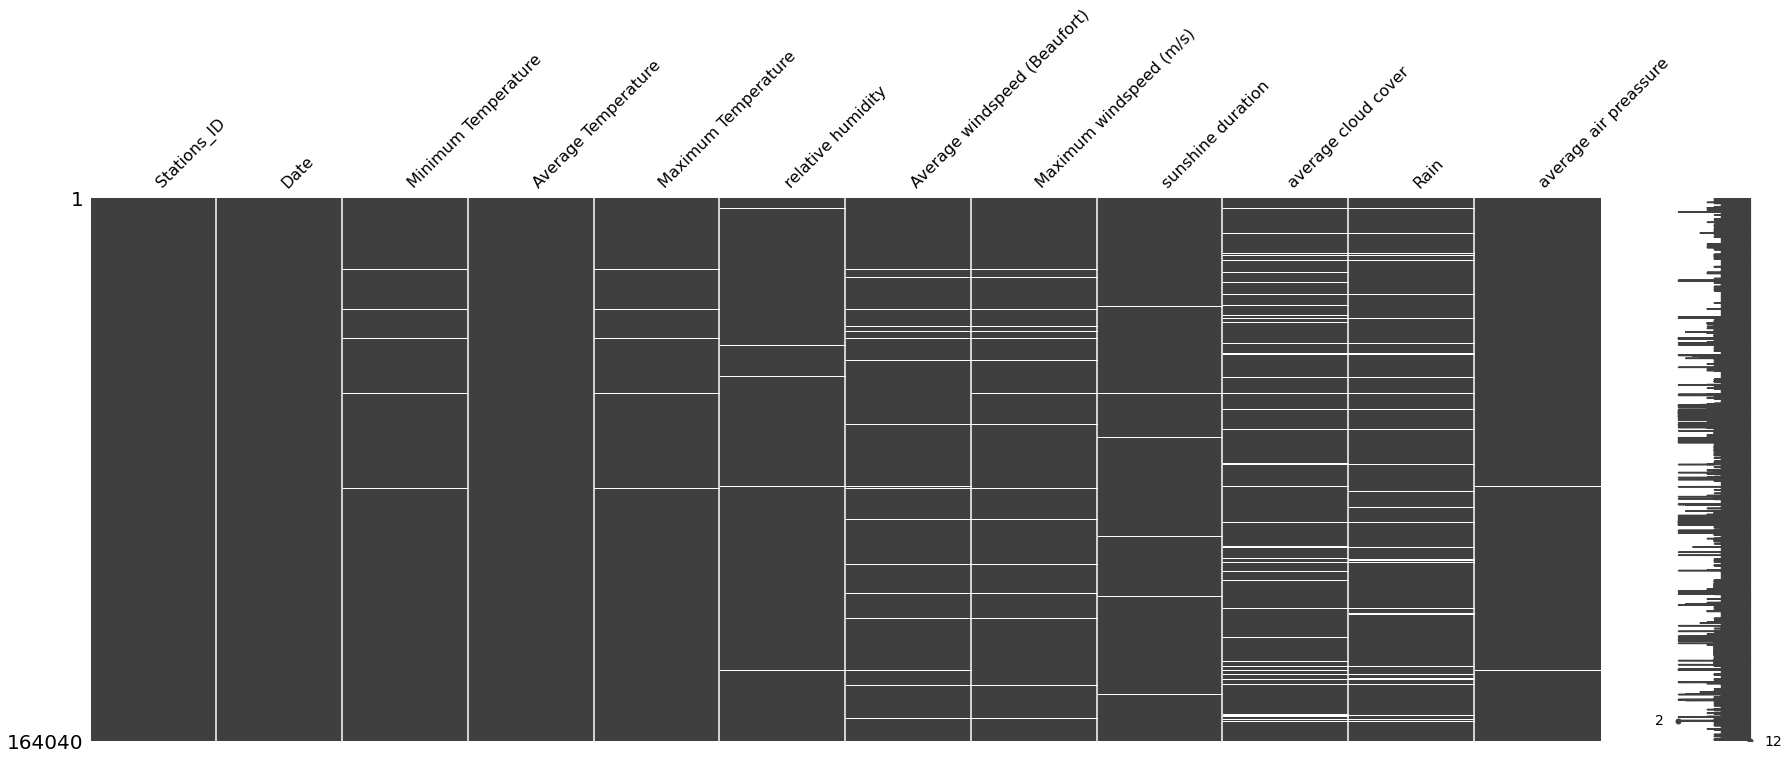

In [16]:
# We start working on weather data
import missingno
# Weather Data
data_w=pd.read_csv('weather.csv')
print("Size of dataframe is ",data_w.shape)
missingno.matrix(data_w, figsize = (30,10))

In [ ]:
'''

Stations 403, 1504 and 1228 have missing data on all days. 

From clustering of stations, it is clear that deleting few station data will not affect our results adversely.

'''

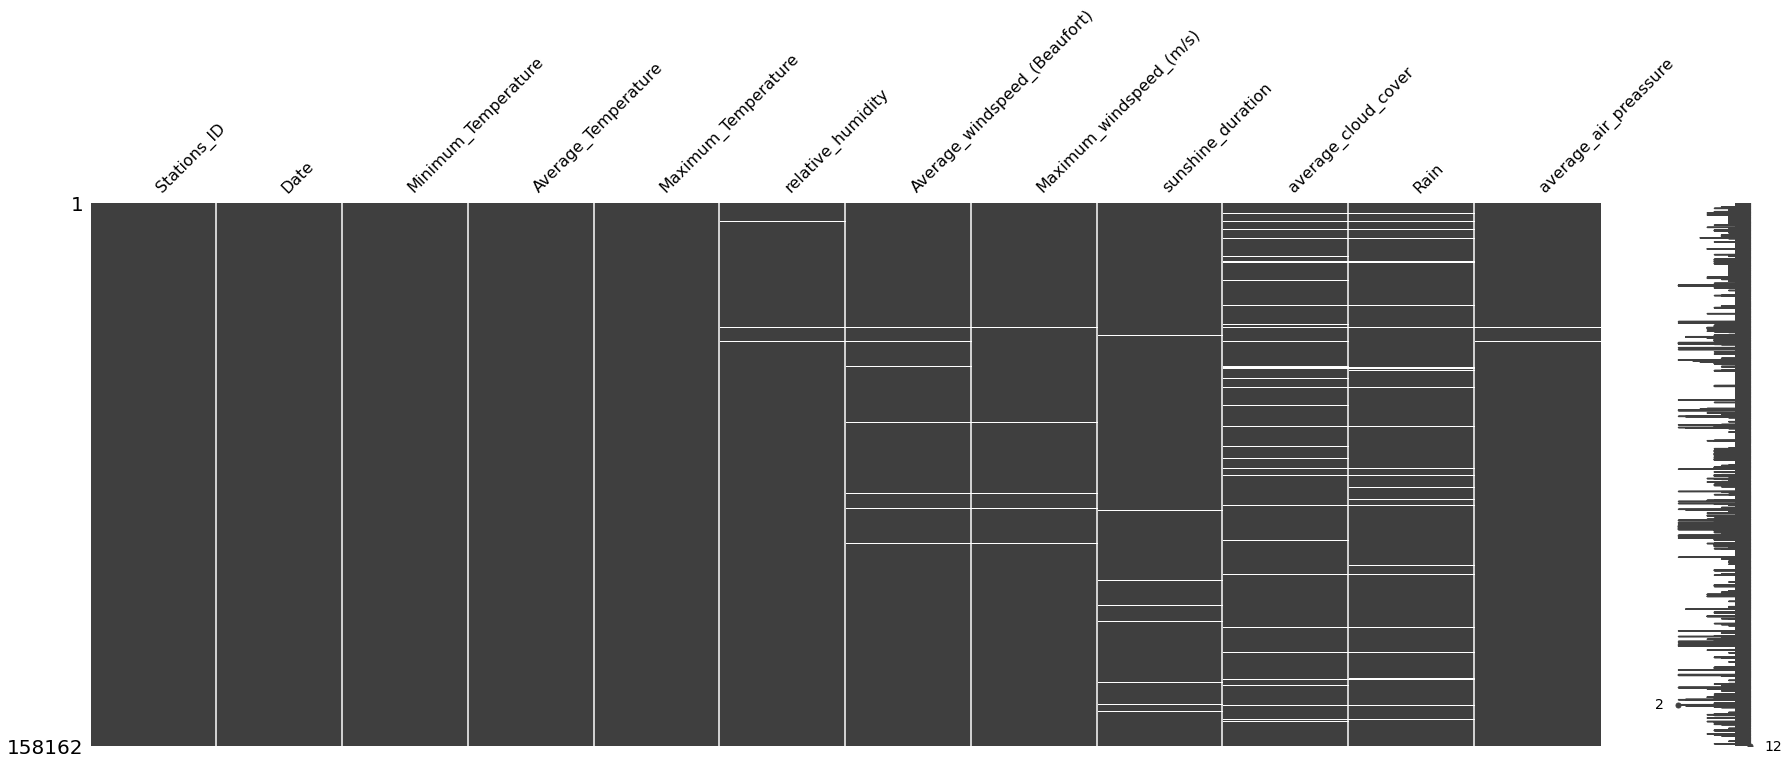

In [17]:
data_w.columns = data_w.columns.str.replace(' ','_')
missing_data=[403,1504,1228]
data_w=data_w[~data_w['Stations_ID'].isin(missing_data)]
missingno.matrix(data_w, figsize = (30,10))

In [18]:
# Still some data is missing. Mean value is filled in the missing section
data_w=data_w.fillna(data_w.mean())
data_w.head()

,Stations_ID,Date,Minimum_Temperature,Average_Temperature,Maximum_Temperature,relative_humidity,Average_windspeed_(Beaufort),Maximum_windspeed_(m/s),sunshine_duration,average_cloud_cover,Rain,average_air_preassure
0,102,2016-01-01,4.1,6.2,7.4,90.13,6.8,12.1,5.733,5.568369,2.142742,1019.03
1,164,2016-01-01,-0.2,0.8,1.9,98.88,1.6,5.4,0.000,8.000000,0.100000,1018.62
2,232,2016-01-01,1.5,2.9,3.9,97.58,2.0,7.6,0.000,7.800000,0.000000,968.28
3,282,2016-01-01,0.5,1.8,3.7,96.21,1.2,4.5,0.000,7.800000,0.000000,997.28
4,183,2016-01-01,1.0,2.4,3.8,98.75,2.9,9.9,0.000,7.800000,0.000000,1020.08


In [19]:
# Getting Date in DD.MM.YYYY format in Date_new column
data_w[['Y','M','D']] = data_w.Date.str.split("-",expand=True,)
data_w['Date_new']=data_w['D']+'.'+data_w['M']+"."+data_w['Y']
data_w.head()

,Stations_ID,Date,Minimum_Temperature,Average_Temperature,Maximum_Temperature,relative_humidity,Average_windspeed_(Beaufort),Maximum_windspeed_(m/s),sunshine_duration,average_cloud_cover,Rain,average_air_preassure,Y,M,D,Date_new
0,102,2016-01-01,4.1,6.2,7.4,90.13,6.8,12.1,5.733,5.568369,2.142742,1019.03,2016,01,01,01.01.2016
1,164,2016-01-01,-0.2,0.8,1.9,98.88,1.6,5.4,0.000,8.000000,0.100000,1018.62,2016,01,01,01.01.2016
2,232,2016-01-01,1.5,2.9,3.9,97.58,2.0,7.6,0.000,7.800000,0.000000,968.28,2016,01,01,01.01.2016
3,282,2016-01-01,0.5,1.8,3.7,96.21,1.2,4.5,0.000,7.800000,0.000000,997.28,2016,01,01,01.01.2016
4,183,2016-01-01,1.0,2.4,3.8,98.75,2.9,9.9,0.000,7.800000,0.000000,1020.08,2016,01,01,01.01.2016


In [23]:
# The output shows that for a particular data, data is available from particular number of stations
data_w[['Y','M','D']] = data_w.Date.str.split("-",expand=True,)
data_w['Date_new']=data_w['D']+'.'+data_w['M']+"."+data_w['Y']
data_w.head()

listoflist=[]
for d in unique_dates:
    date_wise_df=data_w[data_w['Date_new']==d]
    print(d, date_wise_df.shape)
    listoflist.append(list(date_wise_df['Stations_ID']))

# Example : On 01.01.2016 we have weather data from 73 stations
#         : On 01.01.2020 we have weather data from 71 stations

01.01.2016 (73, 16)
01.01.2017 (73, 16)
01.01.2018 (73, 16)
01.01.2019 (72, 16)
01.01.2020 (71, 16)
01.01.2021 (71, 16)
01.02.2016 (73, 16)
01.02.2017 (73, 16)
01.02.2018 (73, 16)
01.02.2019 (73, 16)
01.02.2020 (71, 16)
01.02.2021 (71, 16)
01.03.2016 (73, 16)
01.03.2017 (73, 16)
01.03.2018 (72, 16)
01.03.2019 (72, 16)
01.03.2020 (71, 16)
01.03.2021 (72, 16)
01.04.2016 (73, 16)
01.04.2017 (73, 16)
01.04.2018 (73, 16)
01.04.2019 (72, 16)
01.04.2020 (72, 16)
01.04.2021 (72, 16)
01.05.2016 (73, 16)
01.05.2017 (73, 16)
01.05.2018 (72, 16)
01.05.2019 (72, 16)
01.05.2020 (72, 16)
01.05.2021 (72, 16)
01.06.2016 (73, 16)
01.06.2017 (73, 16)
01.06.2018 (72, 16)
01.06.2019 (72, 16)
01.06.2020 (72, 16)
01.06.2021 (71, 16)
01.07.2016 (73, 16)
01.07.2017 (73, 16)
01.07.2018 (73, 16)
01.07.2019 (72, 16)
01.07.2020 (72, 16)
01.07.2021 (70, 16)
01.08.2016 (73, 16)
01.08.2017 (73, 16)
01.08.2018 (73, 16)
01.08.2019 (71, 16)
01.08.2020 (72, 16)
01.08.2021 (71, 16)
01.09.2016 (73, 16)
01.09.2017 (73, 16)


In [25]:
# We find the stations which provide data for all the dates
set.intersection(*map(set,listoflist))
print("Number of weather stations having data for every day: ",len(set.intersection(*map(set,listoflist))))
common_stations=list(set.intersection(*map(set,listoflist)))
print("List of Station ID's")
common_stations

Number of weather stations having data for every day:  67
List of Station ID's


[2564,
 4104,
 1420,
 5516,
 5371,
 4625,
 3730,
 3987,
 1684,
 5906,
 5397,
 4887,
 2712,
 15000,
 1048,
 282,
 3231,
 5792,
 164,
 1832,
 7341,
 4271,
 3631,
 433,
 3761,
 691,
 4911,
 2483,
 3126,
 183,
 1975,
 1078,
 1468,
 1346,
 4931,
 3015,
 5705,
 1612,
 1358,
 5839,
 3196,
 4177,
 722,
 3028,
 3668,
 2261,
 3032,
 1757,
 2014,
 5856,
 102,
 1639,
 232,
 1766,
 2667,
 5100,
 1262,
 5871,
 4336,
 880,
 4466,
 2290,
 2932,
 1270,
 891,
 2812,
 2559]

In [ ]:
'''
Wind energy generation Features:

Factors that affect power generated by Wind turbines are wind speed, turbine swept area, air density, weather temperature 
and height of tower. Wind power is directly proportional to air density. Wind power is exponentially proportional to wind 
speed. If wind speed doubles, power generation becomes eight times greater. 

Hence, we choose the following features for training the neural network predicting the onshore and offshore energy produced
by wind power plants: Average windspeed (Beaufort), Maximum windspeed (m/s), relative humidity, average air pressure
'''

In [22]:
# Dataframe for training our neural network (Wind offshore)

wind_final_offshore_list=[]
wind_columns=['relative_humidity','Average_windspeed_(Beaufort)','Maximum_windspeed_(m/s)','average_air_preassure']

# flattening the data to make it neural network ready
# (essentially, putting all stationwise data for a given date in one row)
for d in unique_dates:
    # create date_wise_df
    date_wise_df=data_w[(data_w['Date_new']==d) & (data_w['Stations_ID'].isin(common_stations))].sort_values(by='Stations_ID',ascending=True)
    # selecting only wind columns
    wind_df=date_wise_df[wind_columns]
    wind_array=list(wind_df.values.reshape(-1))
    wind_array.append(d)
    wind_array.append(data_epi[data_epi['Date']==d]['Wind_Offshore[MW]'].values[0])
    wind_final_offshore_list.append(wind_array) 

wind_final_offshore_df=pd.DataFrame(wind_final_offshore_list)
wind_final_offshore_df.head()

# Here data from columns 0 to 267 are features, column 268 has date and column 269 has the energy produced on that date
# Example for 0 index Station 1 features (90.13 6.8 12.1 1019.03) Station 2 features (98.88 1.6 5.4 1018.62), Energy produced : 20999

,0,1,2,3,4,5,6,7,8,9,...,260,261,262,263,264,265,266,267,268,269
0,90.13,6.8,12.1,1019.03,98.88,1.6,5.4,1018.62,98.75,2.9,...,91.63,1.7,7.1,1010.72,89.17,4.4,11.9,994.22,01.01.2016,20999
1,96.21,11.7,17.2,1010.84,84.50,4.7,10.5,1009.35,95.38,10.5,...,94.54,2.2,6.8,1008.61,76.33,5.6,12.2,991.80,01.01.2017,51767
2,86.04,13.1,26.1,990.76,73.25,5.7,16.2,992.98,87.33,9.6,...,72.96,5.2,15.6,989.56,87.08,8.9,23.5,972.98,01.01.2018,76080
3,77.39,19.0,33.9,1017.14,83.04,9.1,19.6,1007.43,78.46,16.5,...,83.50,3.9,15.1,1013.79,91.04,6.7,12.8,1002.38,01.01.2019,54892
4,95.79,5.4,11.1,1027.80,87.58,3.8,9.2,1025.07,87.13,9.8,...,90.79,1.3,5.6,1019.30,91.38,1.8,4.8,1002.96,01.01.2020,68985


In [26]:
# Wind offshore weather features from different stations on a particular date
wind_final_offshore_df.iloc[:,0:268].head()

,0,1,2,3,4,5,6,7,8,9,...,258,259,260,261,262,263,264,265,266,267
0,90.13,6.8,12.1,1019.03,98.88,1.6,5.4,1018.62,98.75,2.9,...,8.3,1013.20,91.63,1.7,7.1,1010.72,89.17,4.4,11.9,994.22
1,96.21,11.7,17.2,1010.84,84.50,4.7,10.5,1009.35,95.38,10.5,...,3.0,1011.74,94.54,2.2,6.8,1008.61,76.33,5.6,12.2,991.80
2,86.04,13.1,26.1,990.76,73.25,5.7,16.2,992.98,87.33,9.6,...,17.8,993.58,72.96,5.2,15.6,989.56,87.08,8.9,23.5,972.98
3,77.39,19.0,33.9,1017.14,83.04,9.1,19.6,1007.43,78.46,16.5,...,10.4,1017.69,83.50,3.9,15.1,1013.79,91.04,6.7,12.8,1002.38
4,95.79,5.4,11.1,1027.80,87.58,3.8,9.2,1025.07,87.13,9.8,...,4.7,1021.50,90.79,1.3,5.6,1019.30,91.38,1.8,4.8,1002.96


In [27]:
# Target values (Energy produced on particular date)
wind_final_offshore_df.iloc[:,269].head()

0    20999
1    51767
2    76080
3    54892
4    68985
Name: 269, dtype: int64

In [28]:
# Dataframe for training our neural network (Wind onshore)
wind_final_onshore_list=[]
wind_columns=['relative_humidity','Average_windspeed_(Beaufort)','Maximum_windspeed_(m/s)','average_air_preassure']

for d in unique_dates:
    date_wise_df=data_w[(data_w['Date_new']==d) & (data_w['Stations_ID'].isin(common_stations))].sort_values(by='Stations_ID',ascending=True)
    wind_df=date_wise_df[wind_columns]
    wind_array=list(wind_df.values.reshape(-1))
    wind_array.append(d)
    wind_array.append(data_epi[data_epi['Date']==d]['Wind_Onshore[MW]'].values[0])
    wind_final_onshore_list.append(wind_array) 
    
wind_final_onshore_df=pd.DataFrame(wind_final_onshore_list)
wind_final_onshore_df.head()

,0,1,2,3,4,5,6,7,8,9,...,260,261,262,263,264,265,266,267,268,269
0,90.13,6.8,12.1,1019.03,98.88,1.6,5.4,1018.62,98.75,2.9,...,91.63,1.7,7.1,1010.72,89.17,4.4,11.9,994.22,01.01.2016,87414
1,96.21,11.7,17.2,1010.84,84.50,4.7,10.5,1009.35,95.38,10.5,...,94.54,2.2,6.8,1008.61,76.33,5.6,12.2,991.80,01.01.2017,258408
2,86.04,13.1,26.1,990.76,73.25,5.7,16.2,992.98,87.33,9.6,...,72.96,5.2,15.6,989.56,87.08,8.9,23.5,972.98,01.01.2018,618611
3,77.39,19.0,33.9,1017.14,83.04,9.1,19.6,1007.43,78.46,16.5,...,83.50,3.9,15.1,1013.79,91.04,6.7,12.8,1002.38,01.01.2019,748907
4,95.79,5.4,11.1,1027.80,87.58,3.8,9.2,1025.07,87.13,9.8,...,90.79,1.3,5.6,1019.30,91.38,1.8,4.8,1002.96,01.01.2020,145338


In [ ]:
'''
Photovoltaic energy generation features:

The performance of PV modules under varying light conditions will differ significantly, which in turn has a severe impact
on the yield of PV systems. (Variation in Solar Radiation) A PV cell, like any other semiconductor device, is very sensitive
to temperature.

The temperature of a PV module increases with increasing solar radiation and air temperature but reduces with increasing
wind speed. Shading results in mismatches in the generated currents of individual cells of a module. Even partial shading on
a single cell can significantly reduce the power output

Hence, we choose the following features for training the neural network predicting the photovoltaic energy produced by
photovoltaic power plants: Sunshine duration, Minimum Temperature, Average Temperature, Maximum Temperature, 
Average windspeed (Beaufort), cloud cover
'''

In [29]:
# Dataframe for training our neural network (Photovoltaic)
photovoltaic_list=[]

photovoltaic_columns=['Minimum_Temperature','Average_Temperature','Maximum_Temperature','Average_windspeed_(Beaufort)','average_cloud_cover','Rain']
for d in unique_dates:
    date_wise_df=data_w[(data_w['Date_new']==d) & (data_w['Stations_ID'].isin(common_stations))].sort_values(by='Stations_ID',ascending=True)
    photovoltaic_df=date_wise_df[photovoltaic_columns]
    photovoltaic_array=list(photovoltaic_df.values.reshape(-1))
    photovoltaic_array.append(d)
    photovoltaic_array.append(data_epi[data_epi['Date']==d]['Photovoltaics[MW]'].values[0])
    photovoltaic_list.append(photovoltaic_array) 
    
photovoltaic_final_df=pd.DataFrame(photovoltaic_list)
photovoltaic_final_df.head()

,0,1,2,3,4,5,6,7,8,9,...,394,395,396,397,398,399,400,401,402,403
0,4.1,6.2,7.4,6.8,5.568369,2.142742,-0.2,0.8,1.9,1.6,...,7.900000,0.0,4.4,5.8,8.0,4.4,7.0,0.2,01.01.2016,18566
1,2.9,4.5,7.1,11.7,5.568369,2.142742,2.3,3.7,4.4,4.7,...,5.568369,0.2,-5.1,-0.4,1.9,5.6,3.9,1.9,01.01.2017,35294
2,5.2,6.5,8.3,13.1,5.568369,2.142742,1.9,7.6,11.6,5.7,...,7.400000,4.1,3.6,5.4,7.1,8.9,6.9,7.6,01.01.2018,29490
3,3.6,7.4,8.5,19.0,5.568369,2.142742,2.8,6.1,8.0,9.1,...,7.500000,0.4,3.4,5.5,6.8,6.7,7.5,2.7,01.01.2019,10095
4,-1.2,1.6,6.6,5.4,5.568369,2.142742,-2.0,2.1,4.0,3.8,...,2.200000,0.0,-3.5,0.1,4.9,1.8,2.2,0.0,01.01.2020,50894


In [ ]:
'''

We now have three data frames for offshore wind energy produced, onshore wind energy produced and photovoltaic energy produced

The data frame contain data of relevant features from 67 stations which have weather data for every date.

We use the artificial neural networks to train and test these dataframes 

'''

## Developing and evaluation of the ANN


In [32]:
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [33]:
# We split the data into training and testing data
train_X, val_X, train_y, val_y = train_test_split(wind_final_offshore_df.iloc[:,0:268], wind_final_offshore_df.iloc[:,269], test_size = 0.3, random_state = 14)

In [35]:
warnings.filterwarnings("ignore")
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(1024, kernel_initializer='normal',input_dim = train_X.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(512, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(128, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(64, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(16, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 1024)              275456    
                                                                 
 dense_8 (Dense)             (None, 512)               524800    
                                                                 
 dense_9 (Dense)             (None, 256)               131328    
                                                                 
 dense_10 (Dense)            (None, 128)               32896     
                                                                 
 dense_11 (Dense)            (None, 64)                8256      
                                                                 
 dense_12 (Dense)            (None, 16)                1040      
                                                                 
 dense_13 (Dense)            (None, 1)                

In [36]:
NN_model.fit(train_X, train_y, epochs=5000, batch_size=32, validation_split = 0.2)

Epoch 1/5000
39/39 [==============================] - 1s 9ms/step - loss: 44884.7031 - mean_absolute_error: 44884.7031 - val_loss: 30347.8438 - val_mean_absolute_error: 30347.8438
Epoch 2/5000
39/39 [==============================] - 0s 6ms/step - loss: 30743.5215 - mean_absolute_error: 30743.5215 - val_loss: 30399.7500 - val_mean_absolute_error: 30399.7500
Epoch 3/5000
39/39 [==============================] - 0s 5ms/step - loss: 30862.3535 - mean_absolute_error: 30862.3535 - val_loss: 30513.7207 - val_mean_absolute_error: 30513.7207
Epoch 4/5000
39/39 [==============================] - 0s 6ms/step - loss: 30588.5254 - mean_absolute_error: 30588.5254 - val_loss: 30136.3965 - val_mean_absolute_error: 30136.3965
Epoch 5/5000
39/39 [==============================] - 0s 4ms/step - loss: 30510.9141 - mean_absolute_error: 30510.9141 - val_loss: 30137.6816 - val_mean_absolute_error: 30137.6816
Epoch 6/5000
39/39 [==============================] - 0s 5ms/step - loss: 30538.4980 - mean_absolute

In [37]:
# Display of first 15 predicted values
predictions = NN_model.predict(val_X)
predictions[0:15]

array([[  5778.843],
       [103261.82 ],
       [ 93666.06 ],
       [ 78451.875],
       [ 42098.23 ],
       [ 40838.55 ],
       [ 12848.415],
       [ 15419.86 ],
       [ 44057.812],
       [ 24661.955],
       [ 14636.987],
       [ 71805.63 ],
       [  6873.941],
       [ 57673.535],
       [ 42842.387]], dtype=float32)

In [38]:
# Display of first 15 actual values
val_y.values[0:15]

array([  5304, 109625, 107089,  78409,  40273,  36564,  20759,  34491,
        29509,  21475,  10053,  75657,   5423,  56924,  66530])

In [ ]:
'''

The above two cells represent the predicted values and actual values respectively.

It is evident that the ANN is giving desirable output with small error.

'''

Text(0.5, 1.0, 'Plot of predicted Vs actual values of offshore Wind energy produced')

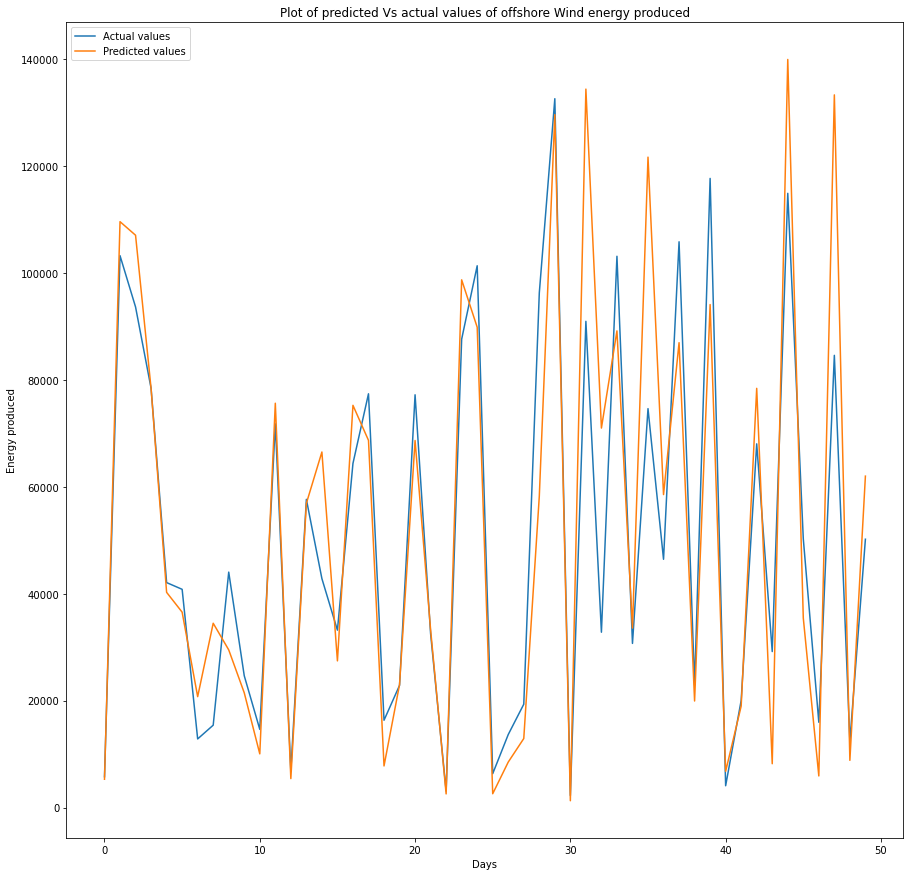

In [43]:
# Plot of predicted values and actual energy produced values
import matplotlib.pyplot as plt
x_coordinates = list(range(50))

y1_coordinates = predictions[0:50]
y2_coordinates = val_y.values[0:50]
fig1, vl = plt.subplots(figsize=(15, 15))
plt.plot(x_coordinates, y1_coordinates, label="Actual values") 
plt.plot(x_coordinates, y2_coordinates, label="Predicted values") 
plt.legend(loc="upper left")
plt.xlabel("Days")
plt.ylabel("Energy produced")
plt.title("Plot of predicted Vs actual values of offshore Wind energy produced")

In [40]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error
print("The mean absolute percentage error is ",mean_absolute_percentage_error(val_y.values, predictions))

The mean absolute percentage error is  0.349648495384825


In [ ]:
'''

Above are the results demonstrating the first 50 predicted and actual values of offshore wind energy produced

Now we start the analysis for onshore wind energy produced 

'''

In [45]:
train_Xo, val_Xo, train_yo, val_yo = train_test_split(wind_final_onshore_df.iloc[:,0:268], wind_final_onshore_df.iloc[:,269], test_size = 0.3, random_state = 14)

In [46]:
warnings.filterwarnings("ignore")
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(1024, kernel_initializer='normal',input_dim = train_Xo.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(512, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(128, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(64, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(16, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 1024)              275456    
                                                                 
 dense_15 (Dense)            (None, 512)               524800    
                                                                 
 dense_16 (Dense)            (None, 256)               131328    
                                                                 
 dense_17 (Dense)            (None, 128)               32896     
                                                                 
 dense_18 (Dense)            (None, 64)                8256      
                                                                 
 dense_19 (Dense)            (None, 16)                1040      
                                                                 
 dense_20 (Dense)            (None, 1)                

In [47]:
NN_model.fit(train_Xo, train_yo, epochs=5000, batch_size=32, validation_split = 0.2)

Epoch 1/5000
39/39 [==============================] - 1s 12ms/step - loss: 201121.4688 - mean_absolute_error: 201121.4688 - val_loss: 138905.5312 - val_mean_absolute_error: 138905.5312
Epoch 2/5000
39/39 [==============================] - 0s 8ms/step - loss: 137804.7969 - mean_absolute_error: 137804.7969 - val_loss: 138537.1562 - val_mean_absolute_error: 138537.1562
Epoch 3/5000
39/39 [==============================] - 0s 8ms/step - loss: 137163.7656 - mean_absolute_error: 137163.7656 - val_loss: 134477.9688 - val_mean_absolute_error: 134477.9688
Epoch 4/5000
39/39 [==============================] - 0s 8ms/step - loss: 136266.3906 - mean_absolute_error: 136266.3906 - val_loss: 133918.3906 - val_mean_absolute_error: 133918.3906
Epoch 5/5000
39/39 [==============================] - 0s 10ms/step - loss: 134925.6719 - mean_absolute_error: 134925.6719 - val_loss: 135627.7500 - val_mean_absolute_error: 135627.7500
Epoch 6/5000
39/39 [==============================] - 0s 9ms/step - loss: 1351

In [48]:
predictions_o = NN_model.predict(val_Xo)
predictions_o[0:15]

array([[110482.92],
       [471162.72],
       [247087.12],
       [412306.62],
       [223088.  ],
       [330537.06],
       [ 60042.4 ],
       [152302.6 ],
       [349379.44],
       [118496.12],
       [ 62297.87],
       [394592.84],
       [ 78472.05],
       [253888.33],
       [251512.17]], dtype=float32)

In [49]:
val_yo.values[0:15]

array([118100, 496554, 239899, 398526, 210332, 340714,  61329, 162319,
       335317, 137971,  25907, 389709,  89787, 236328, 245213])

Text(0.5, 1.0, 'Plot of predicted Vs actual values of onshore Wind energy produced')

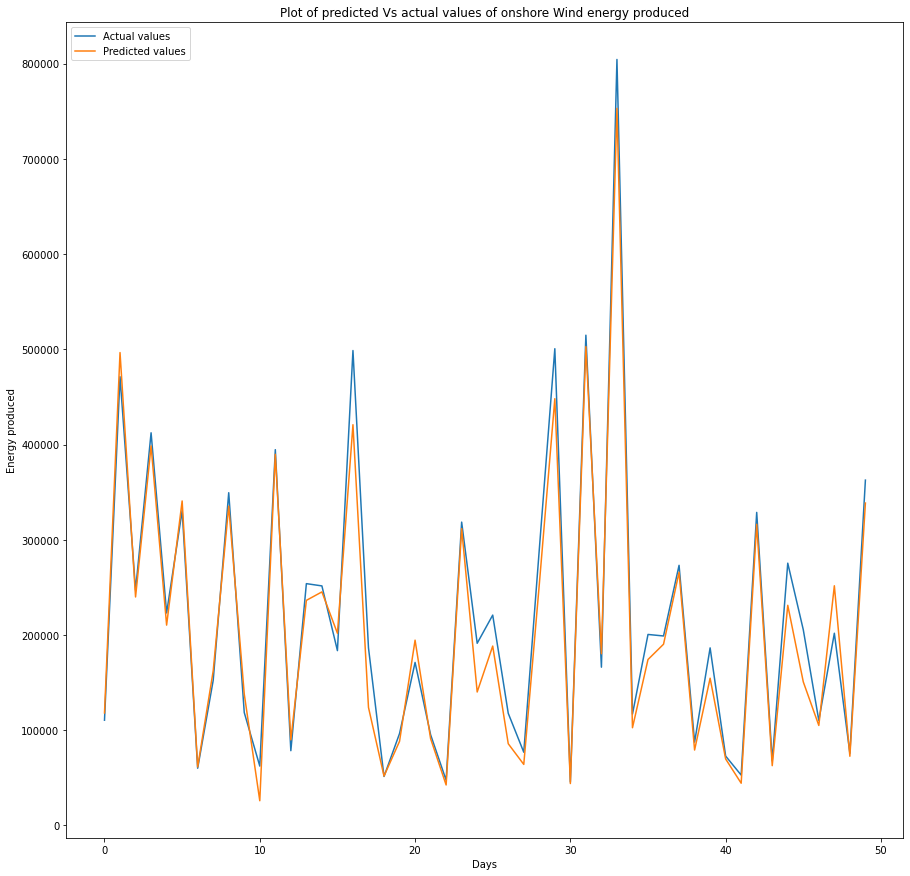

In [50]:
# Plot of predicted values and actual energy produced values
import matplotlib.pyplot as plt
x_coordinates = list(range(50))

y1_coordinates = predictions_o[0:50]
y2_coordinates = val_yo.values[0:50]
fig1, vl = plt.subplots(figsize=(15, 15))
plt.plot(x_coordinates, y1_coordinates, label="Actual values") 
plt.plot(x_coordinates, y2_coordinates, label="Predicted values") 
plt.legend(loc="upper left")
plt.xlabel("Days")
plt.ylabel("Energy produced")
plt.title("Plot of predicted Vs actual values of onshore Wind energy produced")

In [51]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error
print("The mean absolute percentage error is ",mean_absolute_percentage_error(val_yo.values, predictions_o))

The mean absolute percentage error is  0.14420235207766155


In [ ]:
'''

Above are the results demonstrating the first 50  predicted and actual values of onshore wind energy produced

Now we start the analysis for Photovoltaic energy produced 

'''

In [52]:
train_Xp, val_Xp, train_yp, val_yp = train_test_split(photovoltaic_final_df.iloc[:,0:402], photovoltaic_final_df.iloc[:,403], test_size = 0.3, random_state = 14)

In [53]:
warnings.filterwarnings("ignore")
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(1024, kernel_initializer='normal',input_dim = train_Xp.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(512, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(128, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(64, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(16, kernel_initializer='normal',activation='relu'))


# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 1024)              412672    
                                                                 
 dense_22 (Dense)            (None, 512)               524800    
                                                                 
 dense_23 (Dense)            (None, 256)               131328    
                                                                 
 dense_24 (Dense)            (None, 128)               32896     
                                                                 
 dense_25 (Dense)            (None, 64)                8256      
                                                                 
 dense_26 (Dense)            (None, 16)                1040      
                                                                 
 dense_27 (Dense)            (None, 1)                

In [54]:
NN_model.fit(train_Xp, train_yp, epochs=5000, batch_size=32, validation_split = 0.2)

Epoch 1/5000
39/39 [==============================] - 1s 16ms/step - loss: 96723.7031 - mean_absolute_error: 96723.7031 - val_loss: 44027.0898 - val_mean_absolute_error: 44027.0898
Epoch 2/5000
39/39 [==============================] - 0s 6ms/step - loss: 44307.3984 - mean_absolute_error: 44307.3984 - val_loss: 40478.9492 - val_mean_absolute_error: 40478.9492
Epoch 3/5000
39/39 [==============================] - 0s 7ms/step - loss: 35162.9492 - mean_absolute_error: 35162.9492 - val_loss: 32193.8984 - val_mean_absolute_error: 32193.8984
Epoch 4/5000
39/39 [==============================] - 0s 6ms/step - loss: 27173.6992 - mean_absolute_error: 27173.6992 - val_loss: 24980.3418 - val_mean_absolute_error: 24980.3418
Epoch 5/5000
39/39 [==============================] - 0s 7ms/step - loss: 23092.9824 - mean_absolute_error: 23092.9824 - val_loss: 23302.4062 - val_mean_absolute_error: 23302.4062
Epoch 6/5000
39/39 [==============================] - 0s 6ms/step - loss: 21025.9961 - mean_absolut

In [55]:
predictions_p = NN_model.predict(val_Xp)
predictions_p[0:15]

array([[283559.06 ],
       [ 31555.807],
       [104508.4  ],
       [152642.33 ],
       [113429.96 ],
       [ 63431.832],
       [125826.1  ],
       [164000.42 ],
       [ 72588.875],
       [259380.36 ],
       [ 11245.251],
       [173257.88 ],
       [127228.56 ],
       [144792.44 ],
       [124174.6  ]], dtype=float32)

In [56]:
val_yp.values[0:15]

array([301767,  17740,  88674, 182091,  99958,  71760, 156830, 122890,
        71801, 226353,  12119, 165310, 122428, 117912, 127067])

Text(0.5, 1.0, 'Plot of predicted Vs actual values of Photovoltaic energy produced')

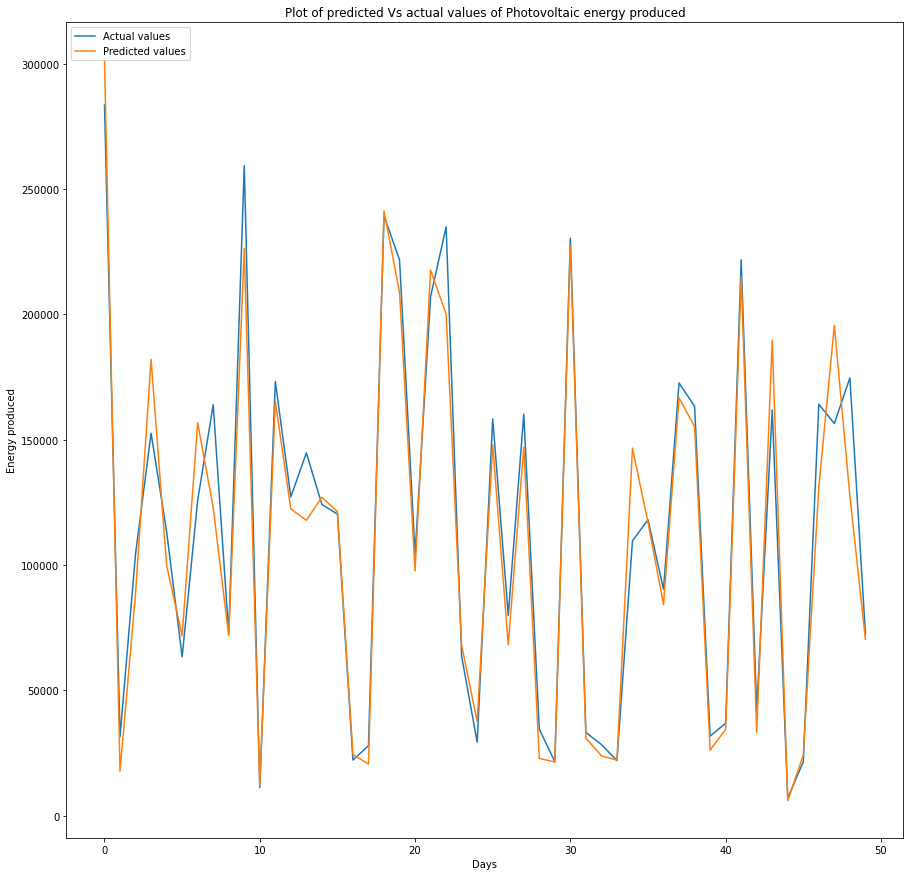

In [57]:
# Plot of predicted values and actual energy produced values
import matplotlib.pyplot as plt
x_coordinates = list(range(50))

y1_coordinates = predictions_p[0:50]
y2_coordinates = val_yp.values[0:50]
fig3, vl = plt.subplots(figsize=(15, 15))
plt.plot(x_coordinates, y1_coordinates, label="Actual values") 
plt.plot(x_coordinates, y2_coordinates, label="Predicted values") 
plt.legend(loc="upper left")
plt.xlabel("Days")
plt.ylabel("Energy produced")
plt.title("Plot of predicted Vs actual values of Photovoltaic energy produced")

In [58]:
print("The mean absolute percentage error is ",mean_absolute_percentage_error(val_yp.values, predictions_p))

The mean absolute percentage error is  0.20543762858119285


In [ ]:
'''

Above are the results demonstrating the first 50  predicted and actual values of Photovoltaic energy produced

'''

## Summary

Is this model usable for predicting the amount of generated renewable energy based on weather data?

In [ ]:
'''

* It is clearly evident thet on the basis of weather data a meaningfully usable forecasting model could be achieved.

* In Exploratory Data Analysis, data wrangling was performed and missing data was handled. Data from some stations was not 
considered for analysis due to mentioned reasons. Deleting data of some stations did'nt affect the analysis as the 
geographical distribution of stations is uniform and few stations from each cluster got deleted. 

* Three models of Neural Networks are trained and tested.
Features for the particular ANN were selected based on Literature review. Different set of features affect wind and 
photovoltaic energy production. Hence Different sets of features of weather data was taken into account for wind and
for Photovoltaic ANN model
The Neural Network takes weather data as input and predicts the energy produced on that day.

* Graphically, the above three plot show the predicted and actual energy produced for 50 test data.
Also, first 15 predicted and actual values of energy produced are displayed which shows that our Neural Network is able 
to predict the output with sufficient accuracy.

* The model which we used is sequential neural network with 5 hidden layers. We used relu activation function and model was 
trained for 5000 epochs

* The mean absolute percentage error for :
Model (Offshore Energy produced Data) : 0.349648495384825
Model (Onshore Energy produced Data) : 0.14420235207766155
Model (Photovoltaic Energy produced Data) : 0.20543762858119285

* Best predicted results are obtained for onshore wind energy produced followed by Photovoltaic energy produced followed by
Offshore energy produced.

* The energy produced can hence be predicted with small margin of error and when trained using forcasted weather data,
predicted values can be used for energy trading and hence making profit.

'''